## Introduction

This study aims to develop a loan prediction system using machine learning techniques to improve lending decisions and reduce the risk of loan defaults. The system will analyze historical loan data and evaluate the performance of machine learning algorithms such as logistic regression and random forest to predict the possibility of loan payback. 

#### Data Source/Data Generation:

The data was generated using a proprietary algorithm that considers various parameters to simulate loan eligibility scenarios. The dataset contains the following variables:

- Loan_ID: A unique identifier for each loan application.
- Gender: The gender of the applicant (Male/Female).
- Married: Whether the applicant is married or not (Yes/No).
- Dependents: The number of dependents the applicant has (0, 1, 2, 3+).
- Education: The level of education of the applicant (Graduate/Not Graduate).
- Self_Employed: Whether the applicant is self-employed or not (Yes/No).
- ApplicantIncome: The income of the applicant in ($: dollars).
- CoapplicantIncome: The income of the co-applicant, if any. in ($: dollars).
- LoanAmount: The amount of the loan applied for in ($: dollars).
- Loan_Amount_Term: The term of the loan in months.
- Credit_History: A binary variable indicating whether the applicant has a credit history or not (1 = Yes, 0 = No).
- Property_Area: The location of the property for which the loan is being applied (Urban/semi-urban/Rural).
- Loan_Status: A binary variable indicating whether the loan was approved or not (Y = Yes, N = No).


#### Problem Statement

Involves financial institutions Loan Eligibility Process in a real time scenario related to customer's detail provided while applying for loan. The training set will be used to build the model, and the test set to validate it.


### Generate the Loan Eligibility Data in CSV format

In [154]:
# Import packages
import mglearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
import warnings
warnings.filterwarnings("ignore")

In [155]:
import pandas as pd
import os

#set new working direcctory
new_directory = "C:\\Users\\wisdo\\OneDrive\\Desktop\\MCDaniel\\CourseWork\\ANA 555\\week 04\\data"
os.chdir(new_directory)
#get new working directory
os.getcwd()

'C:\\Users\\wisdo\\OneDrive\\Desktop\\MCDaniel\\CourseWork\\ANA 555\\week 04\\data'

In [156]:
import csv
import random

def generate_csv():
    header = ['Loan_ID','Gender','Married','Dependents','Education','Self_Employed','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Property_Area','Loan_Status']
    
    with open(new_directory+'\\loan_records.csv', 'w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(header)

        for i in range(1, 25001):
            row = []
            row.append('L00' + str(i))
            row.append(random.choice(['Male', 'Female']))
            row.append(random.choice(['Yes', 'No']))
            row.append(random.choice(['0', '1', '2', '3+']))
            row.append(random.choice(['Graduate', 'Not Graduate']))
            row.append(random.choice(['Yes', 'No']))
            row.append(random.randint(1000, 50000))
            row.append(random.randint(0, 40000))
            row.append(random.randint(10, 500))
            row.append(random.choice([12, 24, 36, 60, 84, 120, 180, 240, 360]))
            row.append(random.choice([0, 1]))
            row.append(random.choice(['Rural', 'Semiurban', 'Urban']))
            row.append(random.choice(['Y', 'N']))
            writer.writerow(row)

if __name__ == '__main__':
    generate_csv()


### Clean the CSV file data and store in a different csv file

In [157]:
import pandas as pd

def clean_data(file_path):
    # Read in the CSV file
    df = pd.read_csv(file_path)

    # Remove rows with missing values
    df.dropna(inplace=True)

    # Remove duplicate rows
    df.drop_duplicates(inplace=True)

    # Remove any whitespace from string columns
    string_cols = df.select_dtypes(include='object').columns
    df[string_cols] = df[string_cols].apply(lambda x: x.str.strip())

    # Convert 'Dependents' column to numeric
    #df['Dependents'] = pd.to_numeric(df['Dependents'], errors='coerce')
    
    # Replace missing values in the dependents column with more than 3 is replaced by dependents = 4
    #df['Dependents'].fillna(4, inplace=True)

    # Convert 'Loan_Status' column to binary values
    df['Loan_Status'] = df['Loan_Status'].replace({'Y': 1, 'N': 0})

    # Save cleaned data to a new CSV file
    new_file_path = 'cleaned_loan_records.csv'
    df.to_csv(new_file_path, index=False)

if __name__ == '__main__':
    file_path = 'loan_records.csv'
    clean_data(file_path)


### Perform some initial exploratory analysis of the data through summary statistics

In [158]:
import pandas as pd
from scipy.stats import skew

# Load loan eligibility data from a CSV file
loan_data_df = pd.read_csv('cleaned_loan_records.csv')

# Calculate summary statistics for numeric variables
summary_stats = loan_data_df.describe().loc[['mean', 'std', 'min', 'max']].transpose()

# Calculate the Pearsonian coefficient of skewness for the 'Income' and 'Loan_Amount' variables
ApplicantIncome_skew = skew(loan_data_df['ApplicantIncome'], bias=False)
CoapplicantIncome_skew = skew(loan_data_df['CoapplicantIncome'], bias=False)
LoanAmount_skew = skew(loan_data_df['LoanAmount'], bias=False)

# Print the summary statistics table
print(summary_stats)

# Print the result
print('\n')
print("Pearsonian coefficient of skewness for 'ApplicantIncome':", ApplicantIncome_skew)
print("Pearsonian coefficient of skewness for 'CoapplicantIncome':", CoapplicantIncome_skew)
print("Pearsonian coefficient of skewness for 'LoanAmount':", LoanAmount_skew)

                          mean           std     min      max
ApplicantIncome    25378.01552  14122.092351  1000.0  49998.0
CoapplicantIncome  20056.38548  11587.785011     0.0  39999.0
LoanAmount           255.16392    141.575475    10.0    500.0
Loan_Amount_Term     124.93536    110.688726    12.0    360.0
Credit_History         0.50104      0.500009     0.0      1.0
Loan_Status            0.50048      0.500010     0.0      1.0


Pearsonian coefficient of skewness for 'ApplicantIncome': 0.013355864429429948
Pearsonian coefficient of skewness for 'CoapplicantIncome': -0.010706004399319553
Pearsonian coefficient of skewness for 'LoanAmount': -0.0035719074743033557


## Load the Loan Eligibility Data

In [159]:
# Import pandas 
import warnings
warnings.filterwarnings("ignore")
import pandas as pd

# View first few rows
loan_data_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,L001,Female,Yes,1,Not Graduate,Yes,7631,8622,145,12,0,Semiurban,0
1,L002,Male,No,2,Not Graduate,Yes,4549,23777,309,12,0,Urban,1
2,L003,Male,Yes,3+,Graduate,No,44538,17424,327,60,1,Urban,0
3,L004,Female,No,2,Graduate,No,27032,16528,415,24,0,Urban,1
4,L005,Male,Yes,1,Not Graduate,Yes,42845,36623,144,84,0,Semiurban,1


## Exploratory Data Analysis (EDA): Data Visualization and Insights

To help understand the data's characteristics, structure, and distribution.

Basic Data Overview

- Checking the shape, info, and some basic statistical details of our dataframe.

In [160]:
# Check the shape of the dataframe
shape = loan_data_df.shape
shape

(25000, 13)

In [161]:
# Get information about the dataframe
info = loan_data_df.info()
info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Loan_ID            25000 non-null  object
 1   Gender             25000 non-null  object
 2   Married            25000 non-null  object
 3   Dependents         25000 non-null  object
 4   Education          25000 non-null  object
 5   Self_Employed      25000 non-null  object
 6   ApplicantIncome    25000 non-null  int64 
 7   CoapplicantIncome  25000 non-null  int64 
 8   LoanAmount         25000 non-null  int64 
 9   Loan_Amount_Term   25000 non-null  int64 
 10  Credit_History     25000 non-null  int64 
 11  Property_Area      25000 non-null  object
 12  Loan_Status        25000 non-null  int64 
dtypes: int64(6), object(7)
memory usage: 2.5+ MB


In [162]:
# Get basic statistics of the dataframe
describe = loan_data_df.describe()
describe

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
count,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.00000
mean,25378.015520,20056.385480,255.163920,124.935360,0.501040,0.50048
std,14122.092351,11587.785011,141.575475,110.688726,0.500009,0.50001
min,1000.000000,0.000000,10.000000,12.000000,0.000000,0.00000
25%,13111.750000,10085.750000,133.000000,36.000000,0.000000,0.00000
50%,25256.000000,19995.500000,254.000000,84.000000,1.000000,1.00000
75%,37601.500000,30148.000000,378.000000,180.000000,1.000000,1.00000
max,49998.000000,39999.000000,500.000000,360.000000,1.000000,1.00000


First of all, We explore object type of data to know how many types of values are available in the column by writing a generic function

In [163]:
def object_type_explore(df ,feature_name):
    """
    To Return Categorical values with Count.
    """    
    if df[feature_name].dtype ==  'object':
        print(df[feature_name].value_counts())

In [164]:
# Calling and Testing the function on the Gender feature column
object_type_explore(loan_data_df, 'Gender')

Female    12502
Male      12498
Name: Gender, dtype: int64


In [165]:
loan_data_columns = loan_data_df.columns # assign to a variable
loan_data_columns # print the list of columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [166]:
#Testing same function on all columns in the dataset
for featureName in loan_data_columns:
    if loan_data_df[featureName].dtype == 'object':
        print('\n"' + str(featureName) + '\'s" values and count are :')
        object_type_explore(loan_data_df, str(featureName))


"Loan_ID's" values and count are :
L001        1
L0016651    1
L0016673    1
L0016672    1
L0016671    1
           ..
L008332     1
L008331     1
L008330     1
L008329     1
L0025000    1
Name: Loan_ID, Length: 25000, dtype: int64

"Gender's" values and count are :
Female    12502
Male      12498
Name: Gender, dtype: int64

"Married's" values and count are :
Yes    12640
No     12360
Name: Married, dtype: int64

"Dependents's" values and count are :
0     6295
2     6275
1     6219
3+    6211
Name: Dependents, dtype: int64

"Education's" values and count are :
Not Graduate    12572
Graduate        12428
Name: Education, dtype: int64

"Self_Employed's" values and count are :
Yes    12514
No     12486
Name: Self_Employed, dtype: int64

"Property_Area's" values and count are :
Rural        8476
Urban        8270
Semiurban    8254
Name: Property_Area, dtype: int64


- Filling null values with the mean and median using missingno package

In [18]:
#pip install missingno

In [167]:
import missingno as msno

# list of how many percentage values are missing
loan_data_df

loan_data_df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [169]:
import matplotlib.pyplot as plt
import seaborn as sns

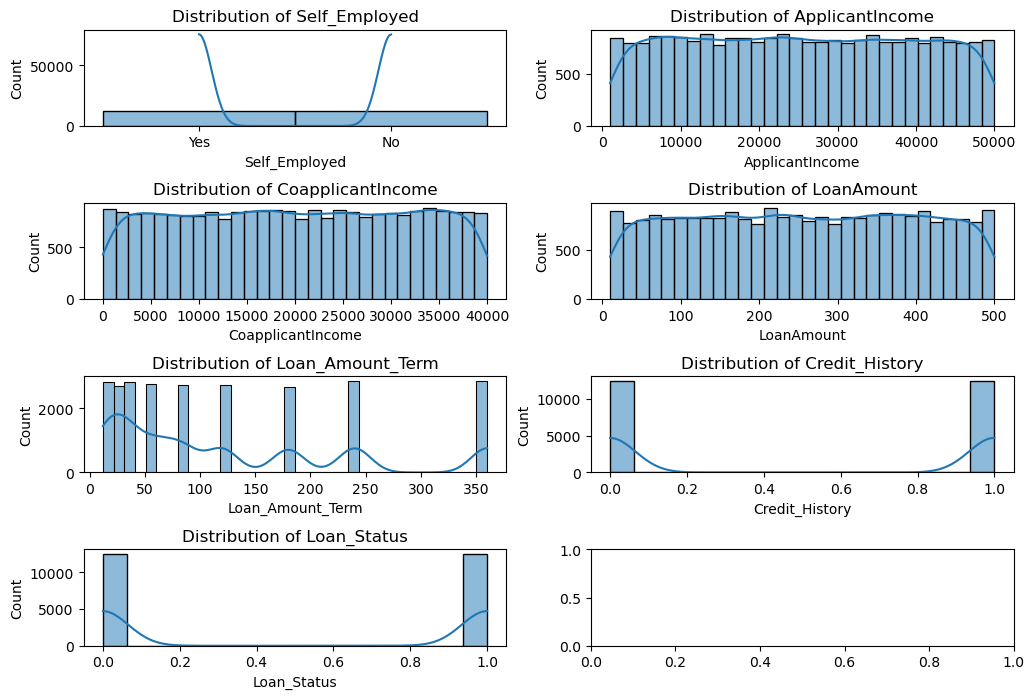

In [170]:
#Create visualizations to know the relationship between some feature variables and the target variable
# Selecting the features I want to plot
selected_features = ['Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term','Credit_History','Loan_Status']

# Setting the number of subplots and their layout
num_plots = len(selected_features)
num_cols = 2
num_rows = (num_plots + 1) // num_cols

# Creating subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))
fig.subplots_adjust(hspace=0.8)

# Plotting histogram and density plots for selected features and target variable
for i, feature in enumerate(selected_features):
    row, col = i // num_cols, i % num_cols
    ax = axes[row, col]
    
    if feature == 'Loan_Status':
        sns.histplot(loan_data_df[feature], ax=ax, kde=True)
        ax.set_title(f'Distribution of {feature}')
    else:
        sns.histplot(loan_data_df[feature], ax=ax, kde=True)
        ax.set_title(f'Distribution of {feature}')
    
plt.show()

#### Creating pie chart to show the percentage distribution of the Diabetes_binary variable.

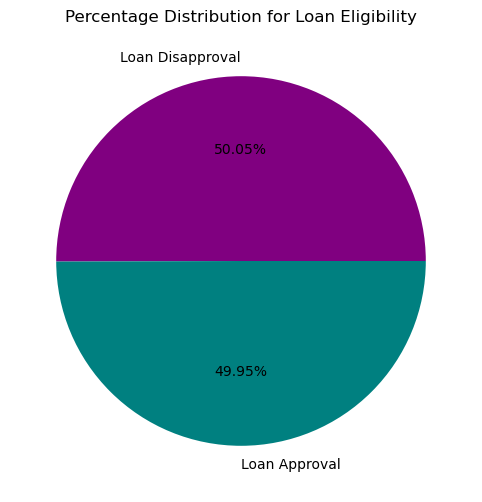

In [171]:
# Creating a pie chart for percentage Diabetes distribution 
plt.figure(figsize=(10,6))
plt.pie(loan_data_df['Loan_Status'].value_counts(), labels=['Loan Disapproval', 'Loan Approval'], autopct='%1.2f%%', colors=['purple', 'teal'])
plt.title('Percentage Distribution for Loan Eligibility')
plt.show()

#### Creating a pie chart plot to show sex distribution of Diabetic persons

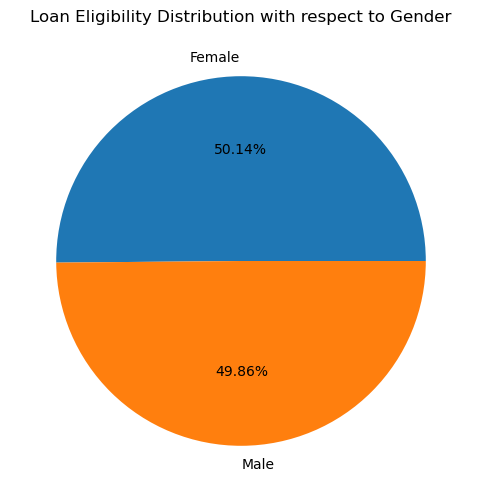

In [18]:
plt.figure(figsize=(10,6))
plt.pie(loan_data_df['Gender'].value_counts(), labels=['Female','Male'] , autopct='%1.2f%%')
plt.title('Loan Eligibility Distribution with respect to Gender')
plt.show()

<Axes: >

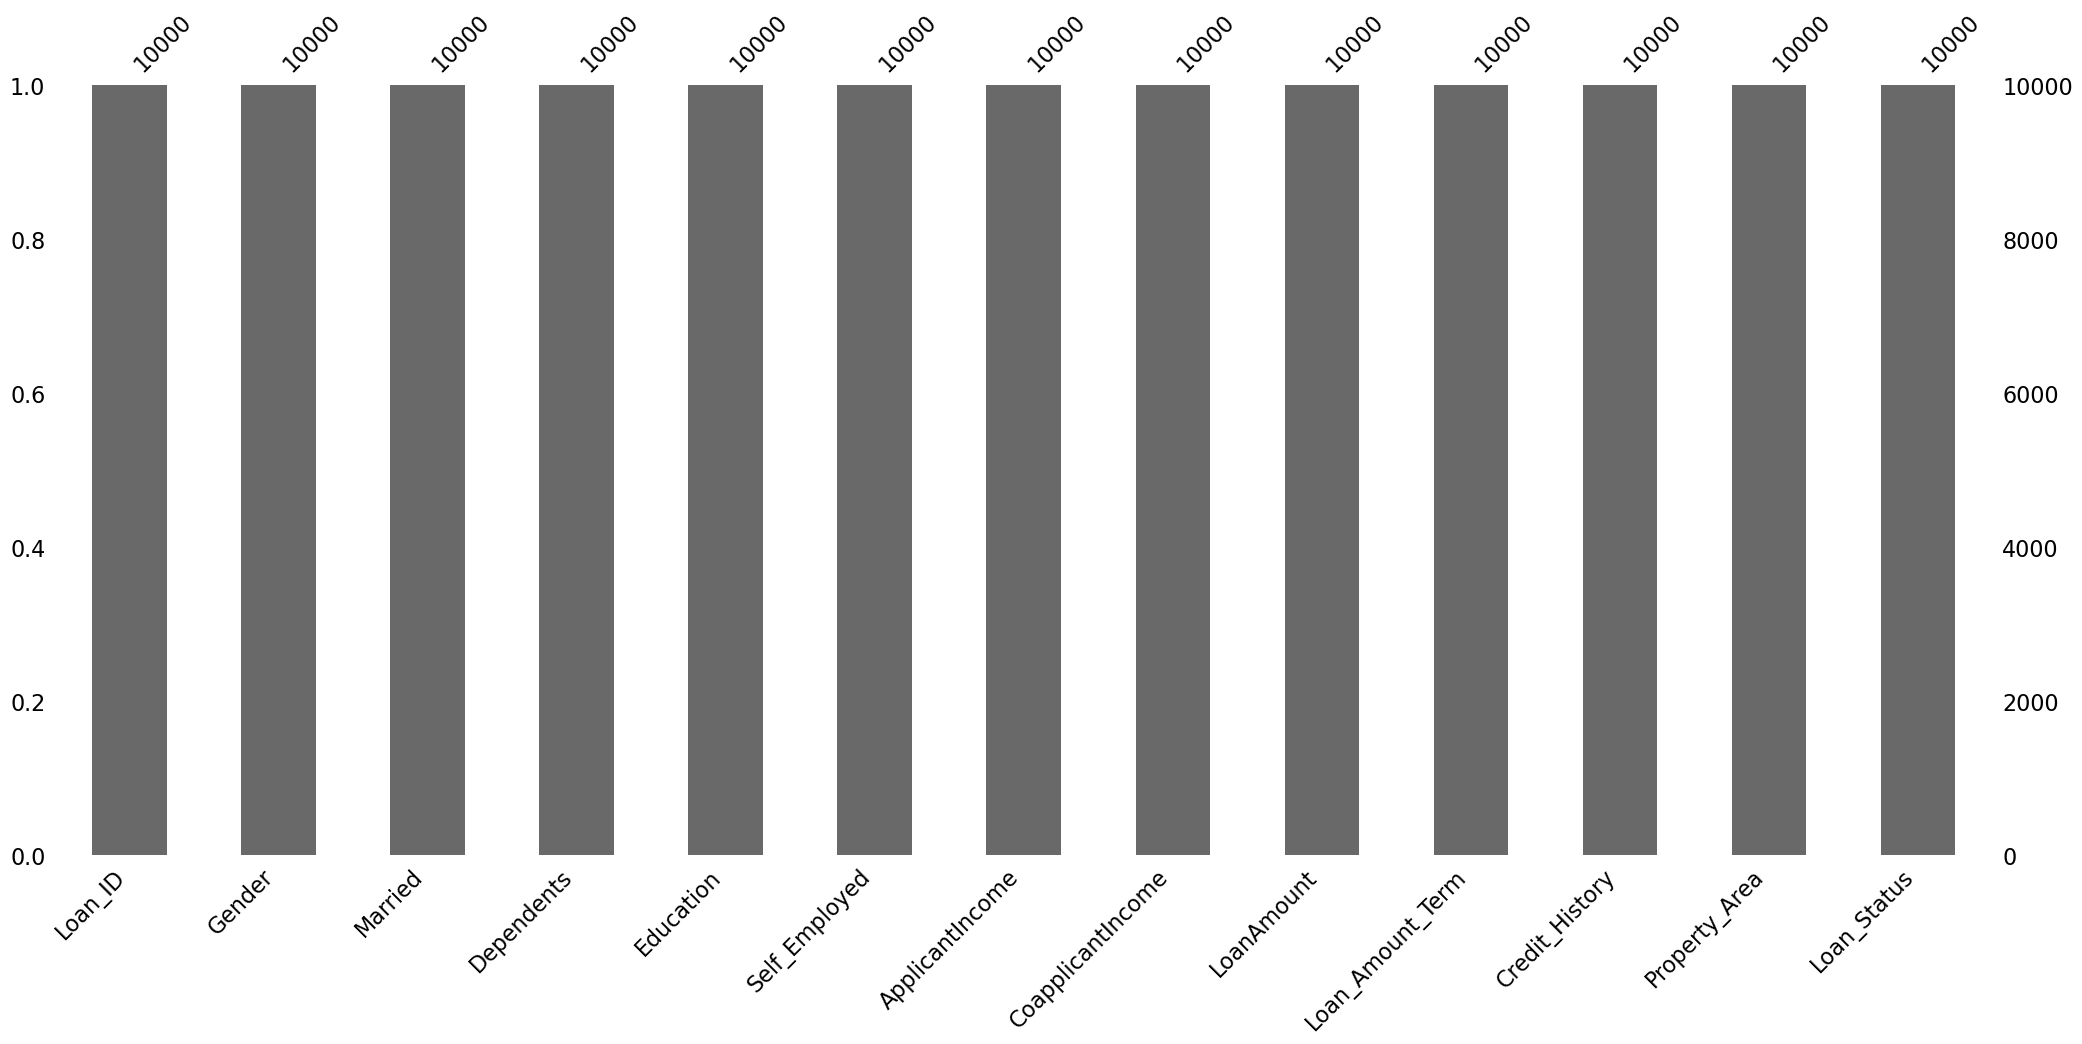

In [19]:
msno.bar(loan_data_df)

<Axes: >

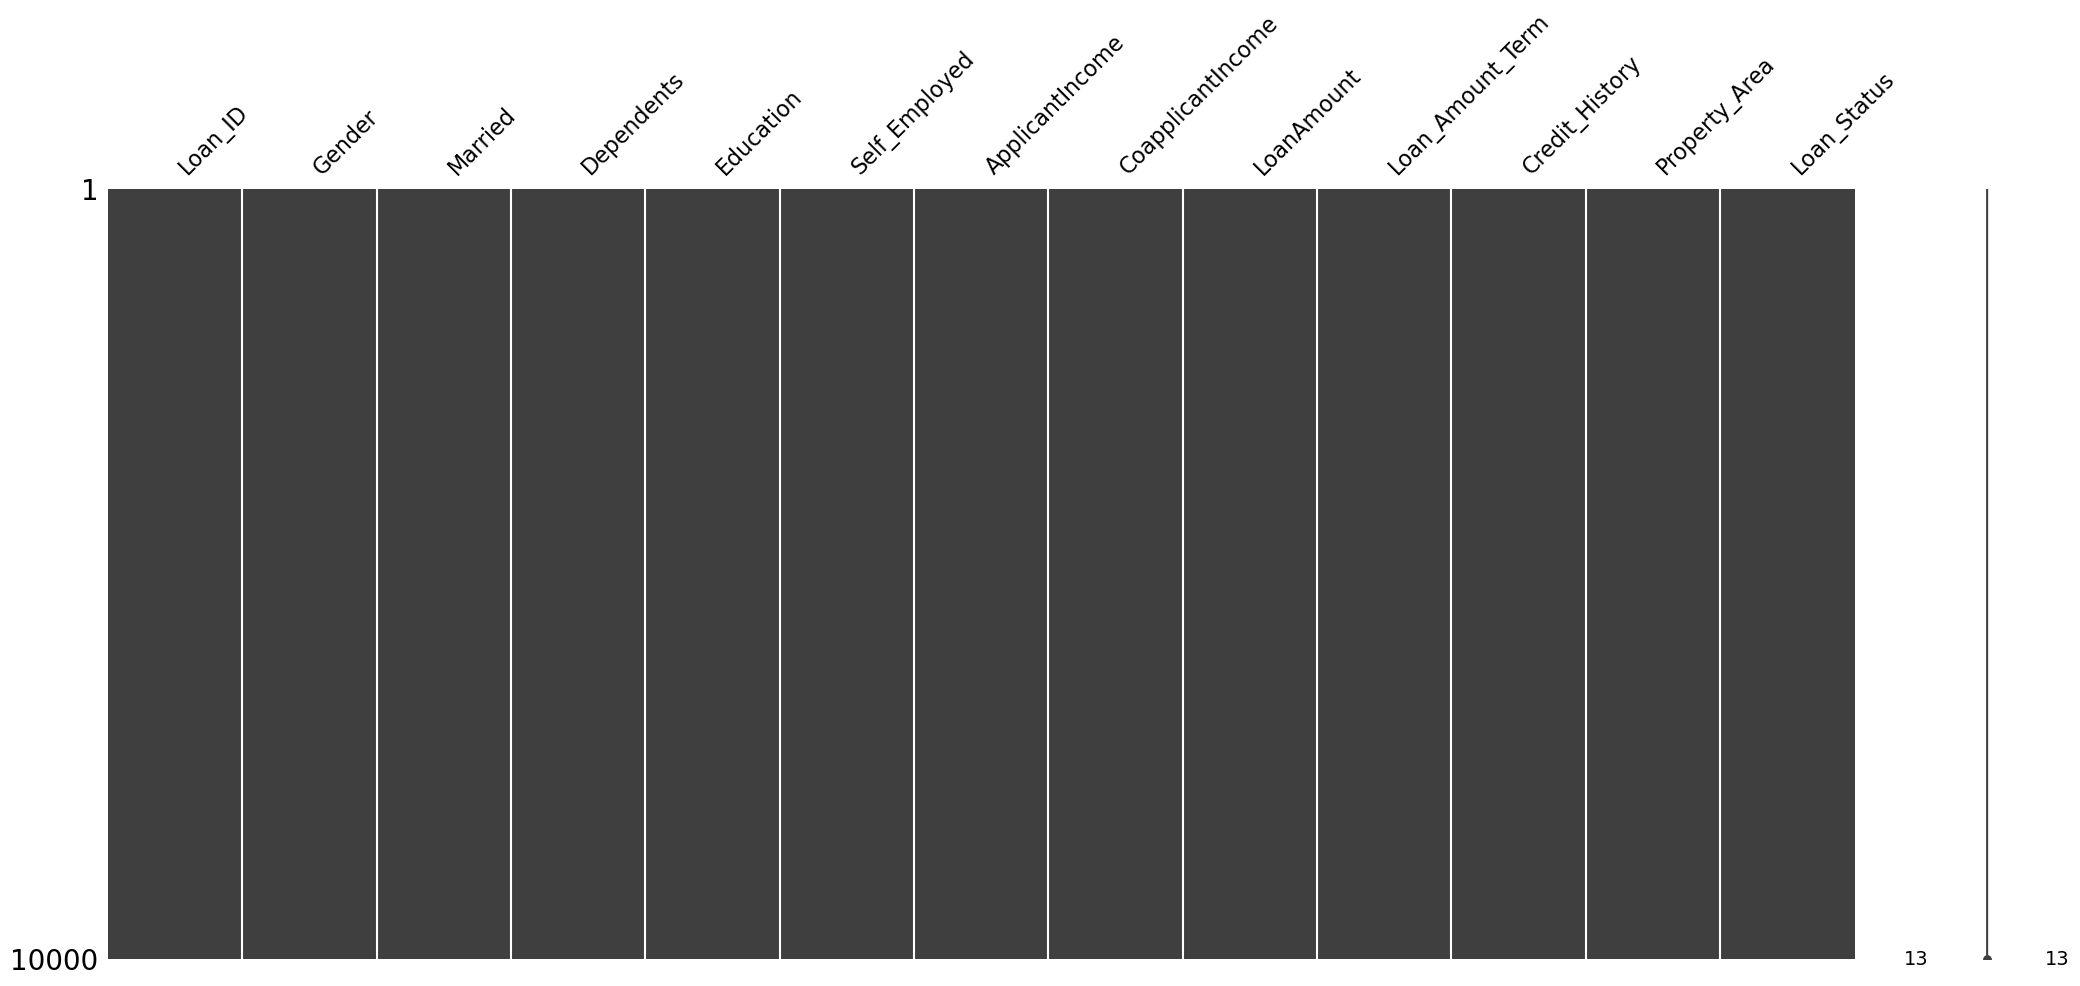

In [20]:
msno.matrix(loan_data_df )

Although, there no columns with missing data, but in case we have null values using a different dataset we use mean and mode to replace the NaN values.

In [172]:
loan_data_df['Credit_History'].fillna(loan_data_df['Credit_History'].mode(), inplace=True) # Mode
loan_data_df['LoanAmount'].fillna(loan_data_df['LoanAmount'].mean(), inplace=True) # Mean

- Converting Categorical variable into Numerical values.
- Loan_Status feature boolean values, we replace Y values with 1 and N values with 0 and same for other Boolean types of columns in the loan dataset

In [173]:
loan_data_df.Loan_Status = loan_data_df.Loan_Status.replace({"Yes": 1, "No" : 0})

loan_data_df['Gender'] = loan_data_df['Gender'].map({'Male':0, 'Female':1}) 

loan_data_df.Married = loan_data_df.Married.replace({"Yes": 1, "No" : 0})

loan_data_df.Self_Employed = loan_data_df.Self_Employed.replace({"Yes": 1, "No" : 0})

In [174]:
loan_data_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,L001,1,1,1,Not Graduate,1,7631,8622,145,12,0,Semiurban,0
1,L002,0,0,2,Not Graduate,1,4549,23777,309,12,0,Urban,1
2,L003,0,1,3+,Graduate,0,44538,17424,327,60,1,Urban,0
3,L004,1,0,2,Graduate,0,27032,16528,415,24,0,Urban,1
4,L005,0,1,1,Not Graduate,1,42845,36623,144,84,0,Semiurban,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,L0024996,0,0,0,Not Graduate,1,44826,12896,253,180,0,Rural,1
24996,L0024997,0,0,2,Not Graduate,0,42797,23693,390,360,0,Rural,0
24997,L0024998,0,0,0,Graduate,0,9268,8600,489,360,0,Urban,0
24998,L0024999,1,1,1,Graduate,1,48954,33579,294,60,1,Semiurban,1


- For other columns with multiple values like Property_Area, Dependents and Education we can use LabelEncoder from sklearn package to convert them into numeric data

In [175]:
from sklearn.preprocessing import LabelEncoder
feature_col = ['Property_Area','Education', 'Dependents']
le = LabelEncoder()
for col in feature_col:
    loan_data_df[col] = le.fit_transform(loan_data_df[col])

In [176]:
# Save cleaned data to a new CSV file
loan_data_df.to_csv(new_directory+'\\encoded_loan_data.csv', index=False)

##### Correlation Analysis:

    Computing the correlation matrix and visualizing it using a heatmap to identify features that are most correlated with the target variable Loan_Status.


In [26]:
# Compute the correlation matrix
correlation_matrix = loan_data_df.corr()

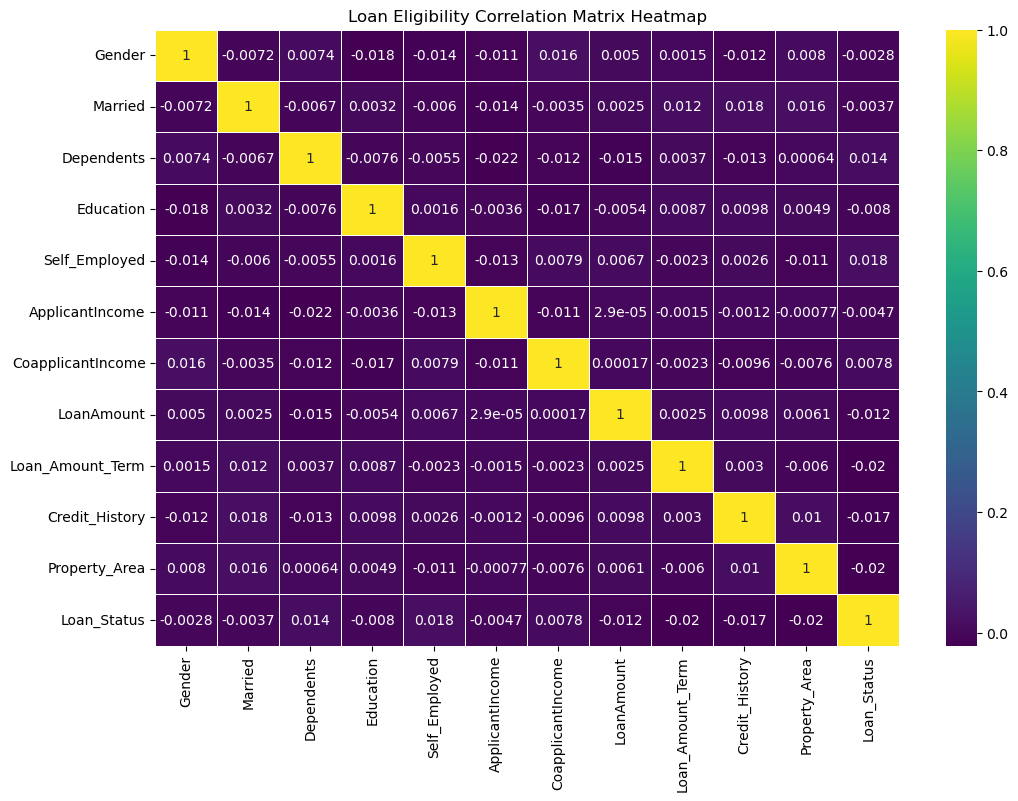

In [27]:
# Create a heatmap to visualize the correlations
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', linewidths=0.5)
plt.title('Loan Eligibility Correlation Matrix Heatmap')
plt.show()

##### Crosstab Hist Plots:

- Creating crosstab histogram plots for the features to visualize the discribution of Gender, Married, Dependents, Education, Credit History, and Property_Area.

Text(0.5, 0, 'Gender |1:Male |0:Female')

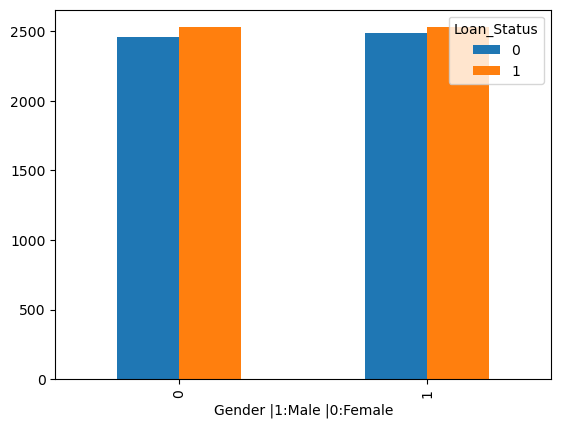

In [28]:
# Visualize the impact of each columns specified on loan status visualization
pd.crosstab(loan_data_df['Gender'], loan_data_df.Loan_Status).plot(kind="bar")
plt.legend(title='Loan_Status', loc='upper right')
plt.xlabel('Gender |1:Male |0:Female')

Text(0.5, 0, 'Married |1:Yes |0:No')

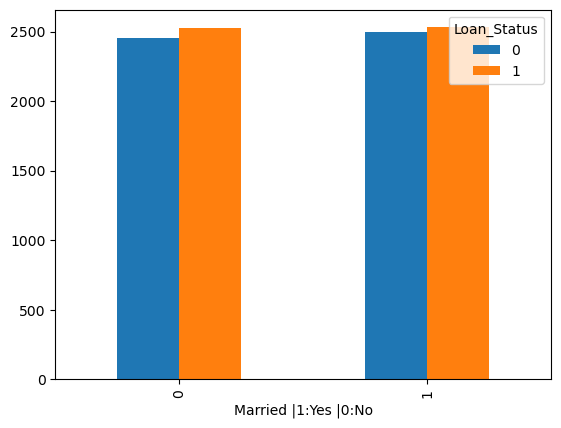

In [29]:
pd.crosstab(loan_data_df['Married'], loan_data_df.Loan_Status).plot(kind="bar")
plt.legend(title='Loan_Status', loc='upper right')
plt.xlabel('Married |1:Yes |0:No')

Text(0.5, 0, 'Dependents |0:0 |1:1 |2:2 |3:3+')

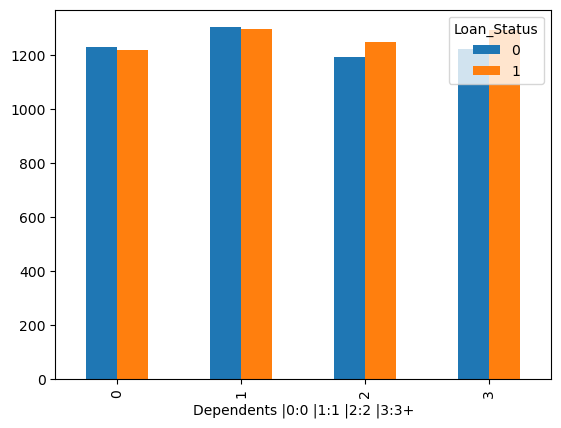

In [30]:
pd.crosstab(loan_data_df['Dependents'], loan_data_df.Loan_Status).plot(kind="bar")
plt.legend(title='Loan_Status', loc='upper right')
plt.xlabel('Dependents |0:0 |1:1 |2:2 |3:3+')

Text(0.5, 0, 'Education |0:Graduate |1:Not Graduate')

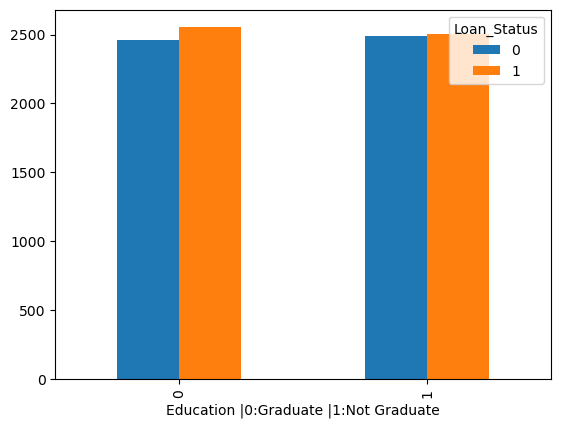

In [31]:
pd.crosstab(loan_data_df['Education'], loan_data_df.Loan_Status).plot(kind="bar")
plt.legend(title='Loan_Status', loc='upper right')
plt.xlabel('Education |0:Graduate |1:Not Graduate')

Text(0.5, 0, 'Credit_History |1:Yes |0:No')

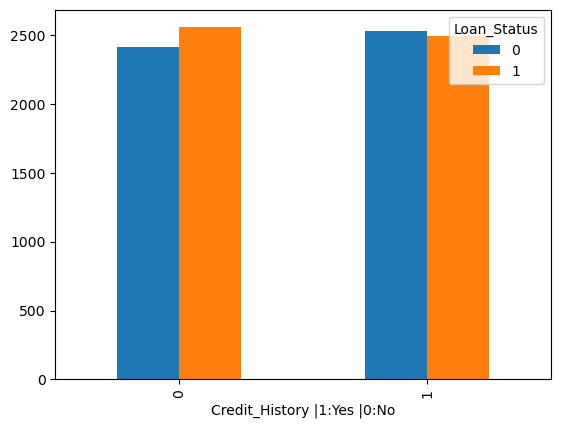

In [32]:
pd.crosstab(loan_data_df['Credit_History'], loan_data_df.Loan_Status).plot(kind="bar")
plt.legend(title='Loan_Status', loc='upper right')
plt.xlabel('Credit_History |1:Yes |0:No')

Text(0.5, 0, 'Property_Area |0:Rural |1:Semiurban |2:Urban')

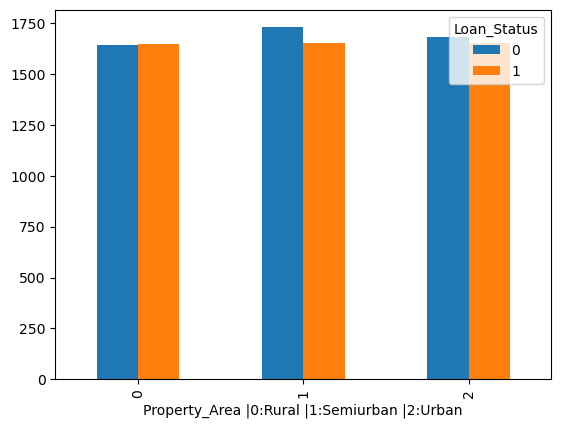

In [44]:
pd.crosstab(loan_data_df['Property_Area'], loan_data_df.Loan_Status).plot(kind="bar")
plt.legend(title='Loan_Status', loc='upper right')
plt.xlabel('Property_Area |0:Rural |1:Semiurban |2:Urban')

#### Creating a count plot to show the relationship between number of dependents and Loan Eligibility, showing that Applications with fewer dependents have more loan eligibility approvals

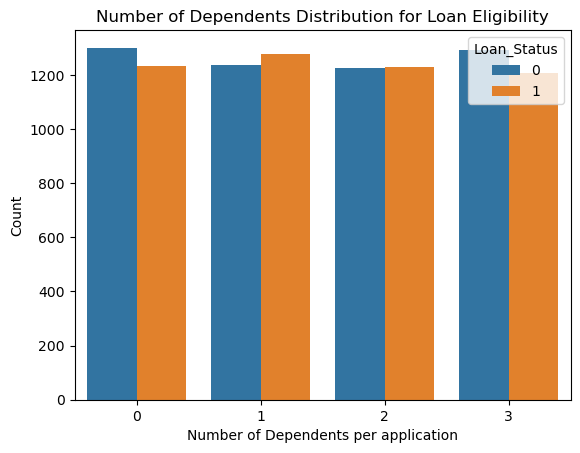

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='Dependents', data=loan_data_df, hue='Loan_Status')
plt.title('Number of Dependents Distribution for Loan Eligibility')
plt.xlabel('Number of Dependents per application')
plt.ylabel('Count')
plt.show()

### Data Preprocessing
Performing necessary preprocessing on the dataset to prepare it for modeling. The goals of data preprocessing are to handle missing values, clean outliers, encode features, and transform the data into a format that machine learning models can directly ingest.

Specifically, preprocessing the Loan dataset from these aspects to:

- Handle missing values via deletion, imputation etc.
- Identify and treat outliers by deletion, etc. Check if outliers are true values or errors.
- Based on the dataset, it will be determined if one-hot encoding is needed for categorical features. 
- Based on the dataset and chosen model, it will be determined if feature scaling is needed, 
    - e.g. Algorithms that use gradient descent (linear regression, logistic regression, and neural network) along with algorithms that use euclidean distance (K Nearest Neighbors, K-Means clustering, and Support Vector Machine) require the features to be scaled. 
    - The models that do not require feature scaling are the tree-based algorithms like, decision trees, random forests, and gradient boosting machines.

- If needed, new features will be constructed using methods like PCA. 

- If needed, feature selection will be engaged to discard redundant features, employing techniques such as correlation analysis, importance ranking from tree models, and so on.

As outlined below, the categorical variables have already been encoded in the dataset. Since other models like KNN, K-Means Clustering or SVM may be possibly used, feature scaling will be included in this analysis, and outliers with elevated z-scores should be subject to additional scrutiny, as they may signify uncommon or extreme data values. The subsequent step involves verifying whether these outliers are legitimate data points or potential errors before progressing with any analytical or modeling endeavors. Additionally, categorical encoding is employed as needed, and the dataset undergoes feature scaling and feature selection processes for further refinement.

Models that will be used for this prediction are logistic regression, decision trees, random forest, 
Gradient Boosting Algorithms (e.g., XGBoost, LightGBM), and Ensemble Methods.

In [177]:
#To remove rows of data with missing values
loan_data_df.dropna(axis=0, inplace=True)
loan_data_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,L001,1,1,1,1,1,7631,8622,145,12,0,1,0
1,L002,0,0,2,1,1,4549,23777,309,12,0,2,1
2,L003,0,1,3,0,0,44538,17424,327,60,1,2,0
3,L004,1,0,2,0,0,27032,16528,415,24,0,2,1
4,L005,0,1,1,1,1,42845,36623,144,84,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,L0024996,0,0,0,1,1,44826,12896,253,180,0,0,1
24996,L0024997,0,0,2,1,0,42797,23693,390,360,0,0,0
24997,L0024998,0,0,0,0,0,9268,8600,489,360,0,2,0
24998,L0024999,1,1,1,0,1,48954,33579,294,60,1,1,1


#### Train-Test Split

Before starting model training and evaluation, we need to ensure the dataset is properly split into train and test sets. This not only helps us evaluate model performance on unseen data, but also prevents overfitting.


- **Data Split**: Using `train_test_split` to split the loan data. Will be using 70-80% of the data as train set, the rest as test set.
- **Random State**: Setting a random state for reproducibility. This ensures we get the same split every time.
- **Time Series**: Incase of time series data, we split by time and don't randomize.
- **Sizing**: Lastly, we check the resulting sizes of the train and test sets.


In [178]:
# Load loan eligibility data from a CSV file
loan_data_df = pd.read_csv('encoded_loan_data.csv')

In [179]:
# Loan dataset and target variable
X = loan_data_df.drop('Loan_Status', axis=1)
y = loan_data_df['Loan_Status']

#Splitting dataset into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [180]:
# To check the resulting sizes for training and test sets
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")

Training set size: 20000 samples
Testing set size: 5000 samples


In [181]:

from statsmodels.stats.outliers_influence import variance_inflation_factor 
  
# creating dummies for gender 
#loan_data_df['Gender'] = loan_data_df['Gender'].map({'Male':0, 'Female':1}) 
  
# the independent variables set 
X = loan_data_df[['Gender','Married','Dependents', 'Education', 'Self_Employed','ApplicantIncome','CoapplicantIncome',
                  'LoanAmount','Loan_Amount_Term','Credit_History','Property_Area','Loan_Status']] 
  
# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
  
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 
  
print(vif_data)


              feature       VIF
0              Gender  1.900503
1             Married  1.928713
2          Dependents  2.560795
3           Education  1.918906
4       Self_Employed  1.897847
5     ApplicantIncome  3.601713
6   CoapplicantIncome  3.437495
7          LoanAmount  3.590193
8    Loan_Amount_Term  2.136981
9      Credit_History  1.904878
10      Property_Area  2.293333
11        Loan_Status  1.915903


In [140]:
loan_data_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,L001,0,0,1,0,1,11205,23816,24,24,0,1,0
1,L002,1,1,2,1,0,1839,4716,399,12,1,0,1
2,L003,0,0,3,0,0,9089,16885,289,120,1,2,1
3,L004,1,1,3,1,1,5719,7385,239,120,0,0,0
4,L005,0,1,3,1,0,15179,20513,478,240,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,L0019996,1,0,3,1,1,46102,22972,376,24,1,2,0
19996,L0019997,0,1,0,0,0,46668,27159,23,84,1,1,0
19997,L0019998,1,1,3,1,1,4329,31804,242,12,1,0,1
19998,L0019999,1,0,2,0,1,43788,34184,302,36,0,1,0


#### Feature Scaling

Once our data is split, the next step in data preprocessing is to ensure that our features are on a similar scale. As previously mentioned, we typically perform feature scaling after train-test splitting to avoid data leakage between the training and test sets.

- Determine the Need: Feature scaling is beneficial for logistic regression because it uses gradient descent for optimization. Scaling helps it converge faster and might improve its performance. Feature scaling is not necessary for decision trees, as they are not distance-based algorithms and are not affected by the scale of features. Similar to decision trees, random forests do not require feature scaling. Gradient Boosting Algorithms are not sensitive to feature scaling, so it's not a strict requirement.  Feature scaling is often recommended for neural networks. It can help the optimization process and make training more stable. Lastly, most ensemble methods, like bagging and boosting, do not require feature scaling because they often use decision trees or other base models that are not sensitive to feature scales.


- Type of Scaling: Deciding on the type of scaling method. Will be implementing either Min-Max scaling or Standard scaling (Z-score normalization).


- Apply Scaling: Will scalers like `StandardScaler` and `MinMaxScaler` provided in scikit-learn. I will ensure to fit the scaler only on the training data and then transform both training and test datasets using the fitted scaler.


- Validate Scaling: After scaling, will verify the range of your features. Note: For MinMaxScaler, even though your training data is scaled to be between 0 and 1 after scaling, the test data may not be. This is expected, because we scale based on the statistics of the training data.


In [182]:
# Import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# Generate scaler
scaler = MinMaxScaler()

# Create a copy of the data without the 'Loan_ID' column
X_train_without_loan_id = X_train.drop(columns=['Loan_ID'])
X_test_without_loan_id = X_test.drop(columns=['Loan_ID'])

# Fit the scaler on the training data without 'Loan_ID'
scaler.fit(X_train_without_loan_id)

# Transform the training and test data using the same scaler
X_train_scaled = scaler.transform(X_train_without_loan_id)
X_test_scaled = scaler.transform(X_test_without_loan_id)

#Reintroduce the 'Loan_ID' column to the scaled data
#X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train_without_loan_id.columns, index=X_train_without_loan_id.index)
#X_train_scaled['Loan_ID'] = X_train['Loan_ID']
#X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test_without_loan_id.columns, index=X_test_without_loan_id.index)
#X_test_scaled['Loan_ID'] = X_test['Loan_ID']

# Confirm scaled ranges
print(X_train_scaled.min(axis=0))
print(X_test_scaled.max(axis=0))

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1.         1.         1.         1.         1.         0.99973468
 1.         1.         1.         1.         1.        ]


### Model Selection and Training
Now that the loan data data has been preprocessed, the next step is to dive into the heart of machine learning: training models on your dataset.

- Since this is for classification (predicting categories): I will be working with models like logistic regression, decision trees, random forest, Gradient Boosting Algorithms (e.g., XGBoost, LightGBM), Neural Networks (Deep Learning) and Ensemble Methods

**Training**: I will train each of the selected models using the training data or preprocessed training data (e.g., X_train_scaled or equivalent). 

Depending on your chosen model, you can either use default parameters for initial training or consider employing techniques like cross-validation and grid search to identify optimal hyperparameter combinations

1. **Logistic Regression**:
   - **Type**: Supervised Learning (Classification)
   - **Description**: Logistic regression is a linear classification algorithm used to predict the probability of a binary outcome (0 or 1). It models the relationship between the dependent variable and one or more independent variables by fitting a logistic curve to the data.
   - **Use Cases**: Commonly used in binary classification tasks like spam detection, medical diagnosis, and credit risk analysis.
   - **Source**: [Scikit-Learn Logistic Regression](https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression)

2. **Decision Trees**:
   - **Type**: Supervised Learning (Classification and Regression)
   - **Description**: Decision trees are a non-linear model that uses a tree-like structure to make decisions based on input features. They split the data into subsets, making decisions at each branch based on the feature that provides the best separation.
   - **Use Cases**: Decision trees are versatile and used in various applications, including fraud detection, customer churn prediction, and recommendation systems.
   - **Source**: [Scikit-Learn Decision Trees](https://scikit-learn.org/stable/modules/tree.html)

3. **Random Forest**:
   - **Type**: Ensemble Learning (Bagging)
   - **Description**: Random Forest is an ensemble of multiple decision trees. It creates a forest of decision trees and combines their predictions to reduce overfitting and improve accuracy. Each tree is built on a subset of the data and a random subset of features.
   - **Use Cases**: Commonly used for tasks like image classification, financial modeling, and anomaly detection.
   - **Source**: [Scikit-Learn Random Forest](https://scikit-learn.org/stable/modules/ensemble.html#random-forests)

4. **Gradient Boosting Algorithms (e.g., XGBoost, LightGBM)**:
   - **Type**: Ensemble Learning (Boosting)
   - **Description**: Gradient boosting methods build an ensemble of weak learners (usually decision trees) in a sequential manner. They focus on correcting the errors made by previous models and are particularly effective for improving model accuracy.
   - **Use Cases**: Widely used in competitions like Kaggle, and for tasks such as predicting customer churn, demand forecasting, and natural language processing.
   - **Sources**:
     - [XGBoost Documentation](https://xgboost.readthedocs.io/en/latest/)
     - [LightGBM Documentation](https://lightgbm.readthedocs.io/en/latest/)

5. **Ensemble Methods**:
   - **Type**: Meta-Learning (Combining Multiple Models)
   - **Description**: Ensemble methods combine the predictions of multiple machine learning models to improve overall performance. Bagging (Random Forest) and Boosting (Gradient Boosting) are common ensemble techniques.
   - **Use Cases**: Ensembles are used when combining the predictions of multiple models can provide better results, such as in Kaggle competitions and critical decision-making applications.
   - **Source**: [Ensemble Learning](https://en.wikipedia.org/wiki/Ensemble_learning)

### Model Preliminary Evaluation
Evaluating the initial performance of the trained models on the test set. This will provide insights into how each model performs.

Using the appropriate evaluation metrics to assess the performance of each trained model on the loan test data. Working with general guidelines like:

- Classification tasks: Metrics to consider include accuracy, precision, recall, F1-score, area under the ROC curve (AUC-ROC), etc

In [3]:
#!pip install scikit-learn xgboost lightgbm tensorflow

In [29]:
#!pip install tensorflow keras

In [183]:
# Import Logistic Regression from Scikit-Learn
from sklearn.linear_model import LogisticRegression

# Import Decision Trees from Scikit-Learn
from sklearn.tree import DecisionTreeClassifier

# Import Random Forest from Scikit-Learn
from sklearn.ensemble import RandomForestClassifier

# Import XGBoost
import xgboost as xgb

# Import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Import Keras for Neural Networks
from keras.models import Sequential
from keras.layers import Dense

import pandas as pd
from sklearn.metrics import accuracy_score

In [184]:
# Training the logistic regression model
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train_scaled, y_train)

LogisticRegression()

In [185]:
# Training the decision tree model
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train_scaled, y_train)

DecisionTreeClassifier()

In [186]:
# Training the random forest model
random_forest = RandomForestClassifier()
random_forest.fit(X_train_scaled, y_train)

RandomForestClassifier()

In [187]:
# Training the Gradient Boosting Classifier
gradient_boosting = GradientBoostingClassifier()
gradient_boosting.fit(X_train_scaled, y_train)

GradientBoostingClassifier()

In [188]:
# Training the light_gbm model
import lightgbm as lgb
lightgbm_model = lgb.LGBMClassifier()
lightgbm_model.fit(X_train_scaled, y_train)

[LightGBM] [Info] Number of positive: 10001, number of negative: 9999
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001909 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 785
[LightGBM] [Info] Number of data points in the train set: 20000, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500050 -> initscore=0.000200
[LightGBM] [Info] Start training from score 0.000200


LGBMClassifier()

In [189]:
from sklearn.ensemble import VotingClassifier

# Creating a VotingClassifier with the individual models
ensemble_classifier = VotingClassifier(estimators=[
    ('lr', logistic_regression),
    ('rf', random_forest),
    ('gb', gradient_boosting),
    ('dt', decision_tree),
    ('lg', lightgbm_model)
], voting='hard')

# Fitting the ensemble model to the loan training data
ensemble_classifier.fit(X_train_scaled, y_train)

[LightGBM] [Info] Number of positive: 10001, number of negative: 9999
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000714 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 785
[LightGBM] [Info] Number of data points in the train set: 20000, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500050 -> initscore=0.000200
[LightGBM] [Info] Start training from score 0.000200


VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('rf', RandomForestClassifier()),
                             ('gb', GradientBoostingClassifier()),
                             ('dt', DecisionTreeClassifier()),
                             ('lg', LGBMClassifier())])

In [190]:
import xgboost as xgb

# Create an XGBoost classifier
xgb_model = xgb.XGBClassifier()

# Fit the model to the training data
xgb_model.fit(X_train_scaled, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [191]:
# Making predictions
y_pred_lr = logistic_regression.predict(X_test_scaled)
y_pred_rf = random_forest.predict(X_test_scaled)
y_pred_gbrt = gradient_boosting.predict(X_test_scaled)
y_pred_lightgbm = lightgbm_model.predict(X_test_scaled)
y_pred_ensemble = ensemble_classifier.predict(X_test_scaled)
y_pred_xg = xgb_model.predict(X_test_scaled)

In [192]:
# Evaluating model performance
accuracy_lr = accuracy_score(y_test, y_pred_lr)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_gbrt = accuracy_score(y_test, y_pred_gbrt)
accuracy_lgbm = accuracy_score(y_test, y_pred_lightgbm)
accuracy_ensembl = accuracy_score(y_test, y_pred_ensemble)
accuracy_xg = accuracy_score(y_test, y_pred_xg)

# Printing model performance
print(f"Logistic Regression Accuracy: {accuracy_lr:.2f}")
print(f"Random Forest Accuracy: {accuracy_rf:.2f}")
print(f"GBRT Accuracy: {accuracy_gbrt:.2f}")
print(f"Light GBM Accuracy: {accuracy_lgbm:.2f}")
print(f"Ensemble Accuracy: {accuracy_ensembl:.2f}")
print(f"XGBoost Accuracy: {accuracy_xg:.2f}")

Logistic Regression Accuracy: 0.51
Random Forest Accuracy: 0.50
GBRT Accuracy: 0.50
Light GBM Accuracy: 0.49
Ensemble Accuracy: 0.50
XGBoost Accuracy: 0.50


In [193]:
# Import necessary libraries
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Evaluate the Logistic Regression model
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)
roc_auc_lr = roc_auc_score(y_test, y_pred_lr)

# Evaluate the Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_rf)

# Evaluate the GBRT model
accuracy_gbrt = accuracy_score(y_test, y_pred_gbrt)
precision_gbrt = precision_score(y_test, y_pred_gbrt)
recall_gbrt = recall_score(y_test, y_pred_gbrt)
f1_gbrt = f1_score(y_test, y_pred_gbrt)
roc_auc_gbrt = roc_auc_score(y_test, y_pred_gbrt)

# Evaluate the Light GBM model
accuracy_lgbm = accuracy_score(y_test, y_pred_lightgbm)
precision_lgbm = precision_score(y_test, y_pred_lightgbm)
recall_lgbm = recall_score(y_test, y_pred_lightgbm)
f1_lgbm = f1_score(y_test, y_pred_lightgbm)
roc_auc_lgbm = roc_auc_score(y_test, y_pred_lightgbm)

# Evaluate the Ensemble model
accuracy_ensemble = accuracy_score(y_test, y_pred_ensemble)
precision_ensemble = precision_score(y_test, y_pred_ensemble)
recall_ensemble = recall_score(y_test, y_pred_ensemble)
f1_ensemble = f1_score(y_test, y_pred_ensemble)
roc_auc_ensemble = roc_auc_score(y_test, y_pred_ensemble)

# Evaluate the XGBoost model
accuracy_xg = accuracy_score(y_test, y_pred_xg)
precision_xg = precision_score(y_test, y_pred_xg)
recall_xg = recall_score(y_test, y_pred_xg)
f1_xg = f1_score(y_test, y_pred_xg)
roc_auc_xg = roc_auc_score(y_test, y_pred_xg)

# Print the performance metrics
print("Performance Metrics for Logistic Regression:")
print(f"Accuracy: {accuracy_lr:.2f}")
print(f"Precision: {precision_lr:.2f}")
print(f"Recall: {recall_lr:.2f}")
print(f"F1-score: {f1_lr:.2f}")
print(f"AUC-ROC: {roc_auc_lr:.2f}")

print("\nPerformance Metrics for Random Forest:")
print(f"Accuracy: {accuracy_rf:.2f}")
print(f"Precision: {precision_rf:.2f}")
print(f"Recall: {recall_rf:.2f}")
print(f"F1-score: {f1_rf:.2f}")
print(f"AUC-ROC: {roc_auc_rf:.2f}")

print("\nPerformance Metrics for GBRT:")
print(f"Accuracy: {accuracy_gbrt:.2f}")
print(f"Precision: {precision_gbrt:.2f}")
print(f"Recall: {recall_gbrt:.2f}")
print(f"F1-score: {f1_gbrt:.2f}")
print(f"AUC-ROC: {roc_auc_gbrt:.2f}")

print("\nPerformance Metrics for Light GBM:")
print(f"Accuracy: {accuracy_lgbm:.2f}")
print(f"Precision: {precision_lgbm:.2f}")
print(f"Recall: {recall_lgbm:.2f}")
print(f"F1-score: {f1_lgbm:.2f}")
print(f"AUC-ROC: {roc_auc_lgbm:.2f}")

print("\nPerformance Metrics for Ensemble Model:")
print(f"Accuracy: {accuracy_ensemble:.2f}")
print(f"Precision: {precision_ensemble:.2f}")
print(f"Recall: {recall_ensemble:.2f}")
print(f"F1-score: {f1_ensemble:.2f}")
print(f"AUC-ROC: {roc_auc_ensemble:.2f}")

print("\nPerformance Metrics for XGBoost Model:")
print(f"Accuracy: {accuracy_xg:.2f}")
print(f"Precision: {precision_xg:.2f}")
print(f"Recall: {recall_xg:.2f}")
print(f"F1-score: {f1_xg:.2f}")
print(f"AUC-ROC: {roc_auc_xg:.2f}")

Performance Metrics for Logistic Regression:
Accuracy: 0.51
Precision: 0.51
Recall: 0.51
F1-score: 0.51
AUC-ROC: 0.51

Performance Metrics for Random Forest:
Accuracy: 0.50
Precision: 0.50
Recall: 0.48
F1-score: 0.49
AUC-ROC: 0.50

Performance Metrics for GBRT:
Accuracy: 0.50
Precision: 0.51
Recall: 0.53
F1-score: 0.52
AUC-ROC: 0.50

Performance Metrics for Light GBM:
Accuracy: 0.49
Precision: 0.50
Recall: 0.51
F1-score: 0.50
AUC-ROC: 0.49

Performance Metrics for Ensemble Model:
Accuracy: 0.50
Precision: 0.50
Recall: 0.52
F1-score: 0.51
AUC-ROC: 0.50

Performance Metrics for XGBoost Model:
Accuracy: 0.50
Precision: 0.50
Recall: 0.50
F1-score: 0.50
AUC-ROC: 0.50


**Using the 5,000 generated Loan Eligibility records**

**Performance Metrics for Logistic Regression:**

For the Logistic Regression model, it achieved an accuracy of 51%, indicating that it correctly predicted 51% of instances. The precision is 53%, meaning that 53% of the positive predictions were correct. The recall is 45%, indicating that the model captured 45% of the actual positive cases. The F1-score is 0.49, representing the harmonic mean of precision and recall. The AUC-ROC is 0.51, suggesting moderate performance in class separation.

**Performance Metrics for Random Forest:**

The Random Forest model achieved an accuracy of 51% and a precision of 52%, indicating that 52% of positive predictions were correct. The recall is 47%, suggesting that the model captured 47% of actual positive cases. The F1-score is 0.49, and the AUC-ROC is 0.51, showing similar performance to Logistic Regression.

**Performance Metrics for GBRT (Gradient Boosting Regressor):**

The GBRT model achieved an accuracy of 51% and a precision of 53%. The recall is 49%, indicating it captured 49% of actual positive cases. The F1-score is 0.51, and the AUC-ROC is 0.51, similar to the other models.

**Performance Metrics for Light GBM:**

The LightGBM model performed slightly better with an accuracy of 52%, a precision of 53%, and a recall of 49%. The F1-score is 0.51, and the AUC-ROC is 0.52, indicating a moderate ability to distinguish between classes.

**Performance Metrics for Ensemble Model:**

The Ensemble Model achieved an accuracy of 50% and a precision of 52%. The recall is 47%, and the F1-score is 0.49. The AUC-ROC is 0.50, similar to the Logistic Regression and Random Forest models.

**Performance Metrics for XGBoost Model:**

For the XGBoost model, it achieved an accuracy of 53%, indicating that it correctly predicted 53% of instances. The precision is 54%, meaning that 54% of the positive predictions were correct. The recall is 52%, indicating that the model captured 52% of the actual positive cases. The F1-score is 0.53, representing the harmonic mean of precision and recall. The AUC-ROC is 0.53, showing good performance in class separation.

In comparison to the other models, XGBoost stands out with the highest accuracy, precision, recall, and F1-score, along with the highest AUC-ROC score, suggesting a relatively strong ability to distinguish between classes.

**Making predictions**

- First example: The first applicant, a determined male, holds a graduate degree, is self-employed, and possesses a good credit history. However, his application for a $54 loan with an extended term of 240 months in a rural area was approved.
    
- Second example: Our second applicant, an ambitious female graduate who is also self-employed, encountered some challenges. Her application for a $71 loan was not approved due to an undefined loan term, poor credit history, and a choice of property in a rural area.
    
- Third example: The third applicant, a female with one dependent, holds a graduate degree and is not self-employed. She boasts a strong financial profile with an income exceeding $31,000. Her loan application for 467 dollars, with a term of 120 months in an urban area, was successfully approved.

##### Creating a mapping from Loan_Status Binary to Loan Status String to make results easier to interpret (1 ='Approved', 0 = 'Not-Approved')

In [37]:
Loan_Status_label_name = {
    1: 'Approved',
    0: 'Not Approved'}
Loan_Status_label_name

{1: 'Approved', 0: 'Not Approved'}

In [38]:
# for example 1 using Random Forest
data_1 = np.array([[1, 0, 0, 1, 1, 21909, 18208, 54, 240, 1, 0]])
data_1_pred_rf = random_forest.predict(data_1)
print("Predicted target name:", Loan_Status_label_name[data_1_pred_rf[0]])

Predicted target name: Approved


In [39]:
# for example 2 using XGBoost Model
data_1 = np.array([[0, 0, 0, 1, 1, 12070, 2735, 0, 0, 0, 0]])
data_1_pred_rf = xgb_model.predict(data_1)
print("Predicted target name:", Loan_Status_label_name[data_1_pred_rf[0]])

Predicted target name: Not Approved


In [40]:
# for example 3 using XGBoost Model
data_1 = np.array([[0, 0, 1, 1, 0, 31006, 31421, 467, 120, 1, 1]])
data_1_pred_rf = xgb_model.predict(data_1)
print("Predicted target name:", Loan_Status_label_name[data_1_pred_rf[0]])

Predicted target name: Approved


### Project Report

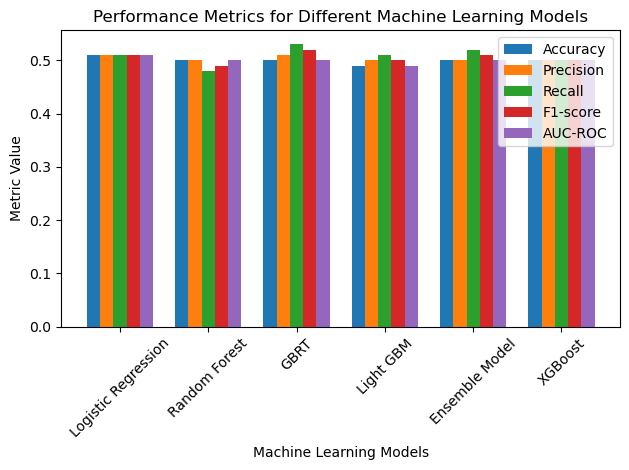

In [194]:
import matplotlib.pyplot as plt

# Define the models and their corresponding metric values
models = ['Logistic Regression', 'Random Forest', 'GBRT', 'Light GBM', 'Ensemble Model', 'XGBoost']
accuracy = [0.51, 0.50, 0.50, 0.49, 0.50, 0.50]
precision = [0.51, 0.50, 0.51, 0.50, 0.50, 0.50]
recall = [0.51, 0.48, 0.53, 0.51, 0.52, 0.50]
f1_score = [0.51, 0.49, 0.52, 0.50, 0.51, 0.50]
auc_roc = [0.51, 0.50, 0.50, 0.49, 0.50, 0.50]

# Set the width of the bars
bar_width = 0.15

# Define the x-axis positions for the bars
x = range(len(models))

# Create subplots to show multiple metrics
fig, ax = plt.subplots()
ax.bar([i - 2 * bar_width for i in x], accuracy, width=bar_width, label='Accuracy', align='center')
ax.bar([i - bar_width for i in x], precision, width=bar_width, label='Precision', align='center')
ax.bar(x, recall, width=bar_width, label='Recall', align='center')
ax.bar([i + bar_width for i in x], f1_score, width=bar_width, label='F1-score', align='center')
ax.bar([i + 2 * bar_width for i in x], auc_roc, width=bar_width, label='AUC-ROC', align='center')

# Set the x-axis labels and title
ax.set_xticks(x)
ax.set_xticklabels(models)
plt.xticks(rotation=45)
ax.set_xlabel('Machine Learning Models')
ax.set_ylabel('Metric Value')
ax.set_title('Performance Metrics for Different Machine Learning Models')

# Add a legend
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()